# Music Genre Classification
In this notebook I tried to learn the basic concepts of neural networks and use it to classify the music files in dataset. Majorly this notebook can be divided into 3 parts:

   1) Using ANN 

   2) Tackling overfitting with ANN

   3) Using CNN


Also to read the dataset I have used librosa library which only read files <1Mb and one file is greater than the size giving error due to which I have ignored it. The dataset contains the following genres, the keys being the prediction targets
    
    0: "disco",
    1: "metal",
    2: "reggae",
    3: "blues",
    4: "rock",
    5: "classical",
    6: "jazz",
    7: "hiphop",
    8: "country",
    9: "pop"


In [1]:
import os
import librosa
import math
import json 
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# dataset_path = r"./input/gtzan-dataset-music-genre-classification/Data/genres_original"
dataset_path = r"/Users/ryansong/Desktop/ww/music/input/genres_original"
json_path = r"./data.json"

In [45]:
import os

def list_files_and_folders(directory):
    print(directory)
    for root, dirs, files in os.walk(directory):
        print(f"Root: {root}")
        print("Directories:")
        for dir_name in dirs:
            print(f"  {dir_name}")
        print("Files:")
        for file_name in files:
            print(f"  {file_name}")
        print()

# Example usage
list_files_and_folders(dataset_path)

/Users/ryansong/Desktop/ww/music/input/genres_original
Root: /Users/ryansong/Desktop/ww/music/input/genres_original
Directories:
  pop
  metal
  disco
  blues
  reggae
  classical
  rock
  hiphop
  country
  jazz
Files:
  .DS_Store

Root: /Users/ryansong/Desktop/ww/music/input/genres_original/pop
Directories:
Files:
  pop.00027.wav
  pop.00033.wav
  pop.00032.wav
  pop.00026.wav
  pop.00030.wav
  pop.00024.wav
  pop.00018.wav
  pop.00019.wav
  pop.00025.wav
  pop.00031.wav
  pop.00009.wav
  pop.00035.wav
  pop.00021.wav
  pop.00020.wav
  pop.00034.wav
  pop.00008.wav
  pop.00022.wav
  pop.00036.wav
  pop.00037.wav
  pop.00023.wav
  pop.00044.wav
  pop.00050.wav
  pop.00078.wav
  pop.00087.wav
  pop.00093.wav
  pop.00092.wav
  pop.00086.wav
  pop.00079.wav
  pop.00051.wav
  pop.00045.wav
  pop.00053.wav
  pop.00047.wav
  pop.00090.wav
  pop.00084.wav
  pop.00085.wav
  pop.00091.wav
  pop.00046.wav
  pop.00052.wav
  pop.00056.wav
  pop.00042.wav
  pop.00095.wav
  pop.00081.wav
  pop.0008

In [46]:
SAMPLE_RATE = 22050
DURATION = 30
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    # Data storage dictionary
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": [],
    }
    samples_ps = int(SAMPLES_PER_TRACK / num_segments)  # ps = per segment
    expected_vects_ps = math.ceil(samples_ps / hop_length)
    
    # Loop through all the genres
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        # Ensuring not at root
        if dirpath != dataset_path:
            # Save the semantic label
            dirpath_comp = dirpath.split("/")
            semantic_label = dirpath_comp[-1]
            data["mapping"].append(semantic_label)
            print(f"Processing: {semantic_label}")
            
            # Process files for specific genre
            for f in filenames:
                if f == "jazz.00054.wav":
                    # As librosa only reads files <1Mb
                    continue
                else:
                    # Load audio file
                    file_path = os.path.join(dirpath, f)
                    signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
                    for s in range(num_segments):
                        start_sample = samples_ps * s
                        finish_sample = start_sample + samples_ps

                        mfcc = librosa.feature.mfcc(
                            y=signal[start_sample:finish_sample],
                            sr=sr,
                            n_fft=n_fft,
                            n_mfcc=n_mfcc,
                            hop_length=hop_length
                        )

                        mfcc = mfcc.T

                        # Store mfcc if it has expected length 
                        if len(mfcc) == expected_vects_ps:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i - 1)
                            print(f"{file_path}, segment: {s + 1}")
    with open(json_path, "w") as f:
        json.dump(data, f, indent=4)

In [47]:
from IPython.display import clear_output

In [48]:
save_mfcc(dataset_path, json_path, num_segments=10)

Processing: pop
/Users/ryansong/Desktop/ww/music/input/genres_original/pop/pop.00027.wav, segment: 1
/Users/ryansong/Desktop/ww/music/input/genres_original/pop/pop.00027.wav, segment: 2
/Users/ryansong/Desktop/ww/music/input/genres_original/pop/pop.00027.wav, segment: 3
/Users/ryansong/Desktop/ww/music/input/genres_original/pop/pop.00027.wav, segment: 4
/Users/ryansong/Desktop/ww/music/input/genres_original/pop/pop.00027.wav, segment: 5
/Users/ryansong/Desktop/ww/music/input/genres_original/pop/pop.00027.wav, segment: 6
/Users/ryansong/Desktop/ww/music/input/genres_original/pop/pop.00027.wav, segment: 7
/Users/ryansong/Desktop/ww/music/input/genres_original/pop/pop.00027.wav, segment: 8
/Users/ryansong/Desktop/ww/music/input/genres_original/pop/pop.00027.wav, segment: 9
/Users/ryansong/Desktop/ww/music/input/genres_original/pop/pop.00027.wav, segment: 10
/Users/ryansong/Desktop/ww/music/input/genres_original/pop/pop.00033.wav, segment: 1
/Users/ryansong/Desktop/ww/music/input/genres_or

In [49]:
filepath = r"./input/genres_original/blues/blues.0000"

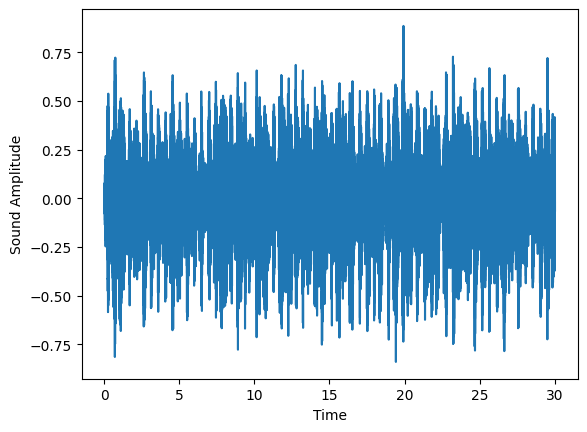

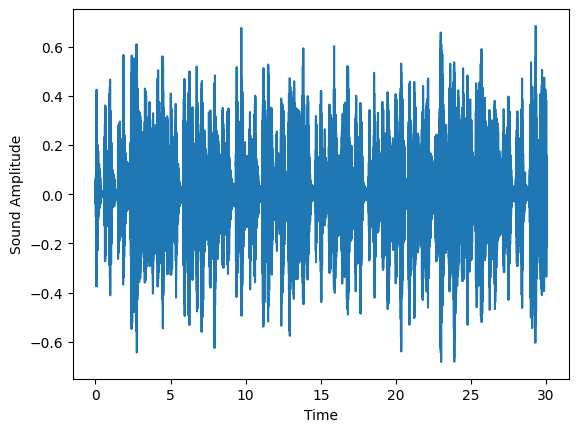

In [50]:
for i in range(2):
    audio, sfreq = librosa.load(filepath+str(i)+".wav")
    time = np.arange(0, len(audio))/sfreq
    plt.plot(time,audio)
    plt.xlabel("Time")
    plt.ylabel("Sound Amplitude")
    plt.show()

# Classifier
This part uses the concepts of ANN with keras and sequential layers. I have also done splitting in the ratio 70:30

The model is Sequential and architecture only has Flatten and the Dense layers available in keras for the basic ANN representation. As it is naive model we can expect it to be overfit. Info on the layers can be found [here](https://machinelearningknowledge.ai/different-types-of-keras-layers-explained-for-beginners/)

In [51]:
import json
import numpy as np

In [52]:
# load data
def load_data(dataset_path):
    with open(dataset_path,"r") as f:
        data = json.load(f)
    
    # Convert list to numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])    
    
    return inputs,targets

In [53]:
inputs,targets = load_data(r"./data.json")
inputs

array([[[-2.18336304e+02,  1.38975708e+02,  1.10363693e+01, ...,
         -1.68071766e+01, -5.64757919e+00, -2.47110214e+01],
        [-2.00653473e+02,  1.35442368e+02,  5.92790651e+00, ...,
         -1.35357590e+01, -8.52425957e+00, -1.89409122e+01],
        [-1.99912170e+02,  1.30874451e+02, -1.45605373e+00, ...,
         -1.98667755e+01, -9.98987675e+00, -8.78959942e+00],
        ...,
        [ 3.11111469e+01,  6.05689545e+01,  1.95401077e+01, ...,
         -5.87557507e+00, -1.29760647e+01, -3.89030123e+00],
        [ 4.58396721e+01,  6.10874710e+01,  1.55057373e+01, ...,
         -8.06866074e+00, -1.02450047e+01, -2.65552950e+00],
        [ 9.01888561e+00,  6.09232368e+01,  7.21001339e+00, ...,
         -2.91970992e+00, -5.54147625e+00,  1.10607886e+00]],

       [[-2.47325363e+01,  6.03365860e+01, -1.56957281e+00, ...,
          4.50840092e+00, -3.60409904e+00, -6.81442976e-01],
        [ 2.96415043e+00,  5.68857880e+01, -1.00340157e+01, ...,
          8.15438926e-01, -1.10899181e

In [54]:
# splitting the data
from sklearn.model_selection import train_test_split

input_train, input_test, target_train, target_test = train_test_split(inputs, targets, test_size=0.3)
print(input_train.shape, target_train.shape)

(6990, 130, 13) (6990,)


In [56]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [70]:
model = Sequential()

model.add(Flatten(input_shape=(inputs.shape[1],inputs.shape[2])))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 1690)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       865,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,014,218 (3.87 MB)

 Trainable params: 1,014,218 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
from tensorflow.keras import optimizers
adam = optimizers.Adam(learning_rate=1e-4)

In [72]:
model.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [73]:
model.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

hist = model.fit(input_train, target_train,
                 validation_data = (input_test, target_test),
                 epochs = 50,
                 batch_size = 32)
hist

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2734 - loss: 14.1968 - val_accuracy: 0.3695 - val_loss: 3.6677
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3965 - loss: 3.0879 - val_accuracy: 0.3992 - val_loss: 2.8980
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4713 - loss: 2.1911 - val_accuracy: 0.4206 - val_loss: 2.7344
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5444 - loss: 1.6888 - val_accuracy: 0.4413 - val_loss: 2.4759
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5840 - loss: 1.3990 - val_accuracy: 0.4266 - val_loss: 2.5434
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6423 - loss: 1.1634 - val_accuracy: 0.4726 - val_loss: 2.1674
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6699 - loss: 1.0658 - val_accuracy: 0.4650 - val_loss: 2.3040
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7196 - loss: 0.8906 - val_accuracy: 0

In [74]:
def plot_history(hist):
    plt.figure(figsize=(20,15))
    fig, axs = plt.subplots(2)
    # accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    # Error subplot
    axs[1].plot(hist.history["loss"], label="train error")
    axs[1].plot(hist.history["val_loss"], label="test error")    
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

<Figure size 2000x1500 with 0 Axes>

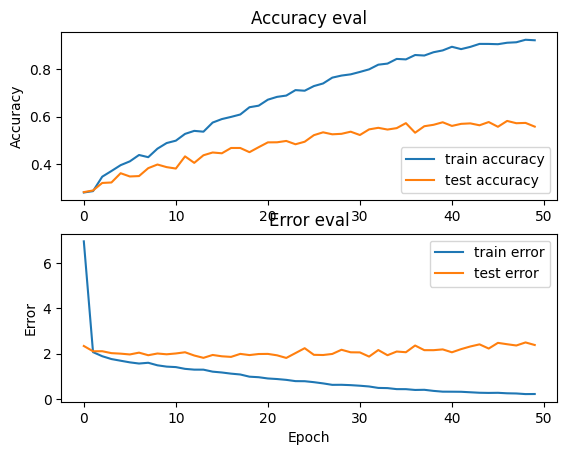

In [63]:
plot_history(hist)

In [75]:
test_error, test_accuracy = model.evaluate(input_test, target_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.5946 - loss: 2.7379
Test accuracy: 0.5894526243209839


# Overfitting
This part deals with the overfitting of the previous model. We can deal with it by majorly doing the following process.
- Making architecture less complicated 
- Using augmented data
- Early stopping of training
- Adding dropout layers
- Regularization / Standardization  

I have added the dropout layers and kernel_regularizers as compared to previous naive model giving the dropout probability as 30%
Kernel_regularizers is one of the 3 type of regularizer used to impose penalties. More info can be found [here](https://medium.com/@robertjohn_15390/regularization-in-tensorflow-using-keras-api-48aba746ae21)

In [76]:
import tensorflow.keras as keras

In [77]:
# Overfitting
model = Sequential()

model.add(Flatten(input_shape=(inputs.shape[1],inputs.shape[2])))
model.add(Dense(512, activation='relu', kernel_regularizer = keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer = keras.regularizers.l2(0.003)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 1690)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       865,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,015,978 (3.88 MB)

 Trainable params: 1,015,978 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

hist = model.fit(input_train, target_train,
                 validation_data = (input_test,target_test),
                 epochs = 50,
                 batch_size = 32)

Epoch 1/50


NotImplementedError: numpy() is only available when eager execution is enabled.

In [ ]:
plot_history(hist)

In [ ]:
test_error, test_accuracy = model.evaluate(input_test, target_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

We can see that the overfitting is greatly reduced but still we are not able to get a good accuracy. Now we will try doing it with Convolutional Neural Network (CNN)

# CNN
Using keras layers of Conv2D, MaxPool2D, BatchNormalization.

CNN layers takes input primarily in 3D shape, so we again have to prepare the dataset in the form and for that, I have used np.newaxis function which adds a column/layer in the data

In [ ]:
def prepare_dataset(test_size, validation_size):
    X,y = load_data(r"./data.json")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = validation_size)
    X_train = X_train[..., np.newaxis]
    X_val = X_val[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_dataset(0.25, 0.2)

In [ ]:
input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])
print(input_shape)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation = "relu", input_shape = input_shape))
model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(32, (2, 2), activation = "relu"))
model.add(MaxPool2D((2, 2), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(16, (1, 1), activation = "relu"))
model.add(MaxPool2D((1, 1), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))

model.summary()

In [ ]:
model.compile(optimizer=adam,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

hist = model.fit(X_train, y_train,
                 validation_data = (X_val, y_val),
                 epochs = 40,
                 batch_size = 32)

In [ ]:
plot_history(hist)

In [ ]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

In [ ]:
def predict(model, X, y):
    X = X[np.newaxis,...]
    prediction = model.predict(X)
    predicted_index = np.argmax(prediction, axis=1)
    print(f"Expected index: {y}, Predicted index: {predicted_index}")

In [ ]:
predict(model, X_test[10], y_test[10])

As we can see the accuracy has improved by Significant amount but still the accuracy is not enough, in the future of this notebook I am planning to implement RNN model in this and finally use the ensembling to get a push in accuracy. However any other suggestions are always invited!